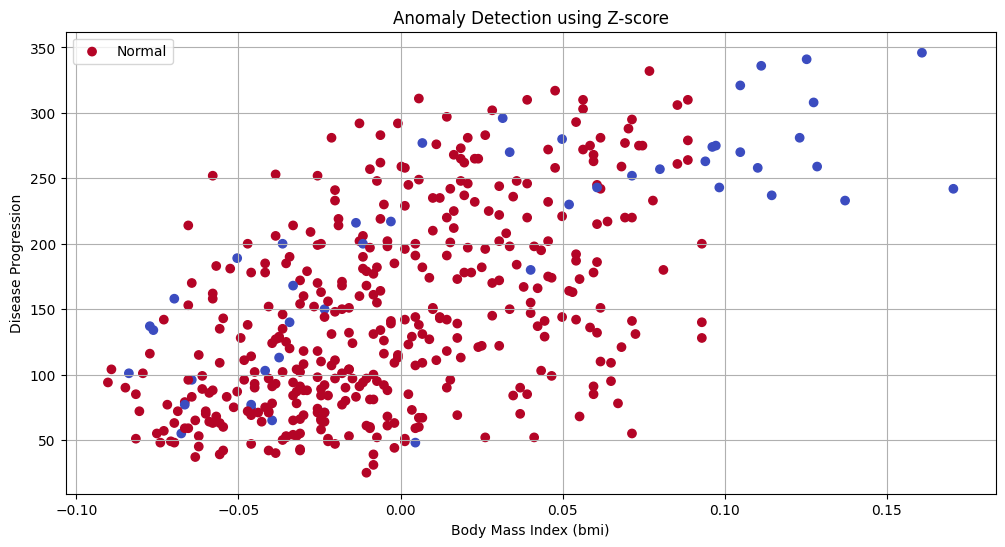

Number of anomalies detected: 47

Anomalous data points:
          age       sex       bmi        bp        s1        s2        s3  \
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
26  -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
32   0.034443  0.050680  0.125287  0.028758 -0.053855 -0.012900 -0.102307   
38  -0.001882  0.050680  0.071397  0.097615  0.087868  0.075407 -0.021311   
41  -0.099961 -0.044642 -0.067641 -0.108956 -0.074494 -0.072712  0.015505   
71  -0.001882 -0.044642  0.033673  0.125158  0.024574  0.026243 -0.010266   
77  -0.096328 -0.044642 -0.036385 -0.074527 -0.038720 -0.027618  0.015505   
79  -0.103593 -0.044642 -0.037463 -0.026328  0.002559  0.019980  0.011824   
84   0.001751 -0.044642 -0.039618 -0.100934 -0.029088 -0.030124  0.044958   
92  -0.020045 -0.044642  0.004572  0.097615  0.005311 -0.020729  0.063367   
93  -0.049105 -0.044642 -0.064408 -0.102070 -0.002945 -0.015406  0.063367   
106 -0.096328 -0.04

In [2]:
# Automated Anomaly Detection using Z-score Method

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Step 2: Load the Diabetes Dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Step 3: Select Features for Analysis
selected_features = ['age', 'bmi', 'bp']
df = data[selected_features].copy()

# Step 4: Calculate Z-scores
means = df.mean()
stds = df.std()
z_scores = (df - means) / stds

# Step 5: Set Z-score Threshold
threshold = 2  # Common thresholds are 2 or 3

# Step 6: Identify Anomalies
anomalies = (np.abs(z_scores) > threshold).any(axis=1)
df['Anomaly'] = anomalies

# Step 7: Visualize Anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df['bmi'], data['target'], c=~df['Anomaly'], cmap='coolwarm', label='Data Points')
plt.xlabel('Body Mass Index (bmi)')
plt.ylabel('Disease Progression')
plt.title('Anomaly Detection using Z-score')
plt.legend(['Normal', 'Anomaly'])
plt.grid(True)
plt.show()

# Step 8: Output Anomalies
print("Number of anomalies detected:", df['Anomaly'].sum())
print("\nAnomalous data points:")
print(data[df['Anomaly']])
